In [1]:
# import necessary libraries modules
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
%matplotlib inline

In [15]:
# load dataset
df = pd.read_excel(r"C:\Users\hp\Downloads\dataset (1) (2).xlsx")
df

,HAEMATOCRIT,HAEMOGLOBINS,ERYTHROCYTE,LEUCOCYTE,THROMBOCYTE,MCH,MCHC,MCV,AGE,SEX,SOURCE
0,33.8,11.1,4.18,4.6,150,26.6,32.8,80.9,33,F,1
1,44.6,14.0,6.86,6.3,232,20.4,31.4,65.0,36,M,0
2,42.9,14.0,4.57,6.2,336,30.6,32.6,93.9,70,F,0
3,41.9,14.4,4.67,3.5,276,30.8,34.4,89.7,18,F,0
4,40.6,13.3,4.85,14.9,711,27.4,32.8,83.7,36,M,0
...,...,...,...,...,...,...,...,...,...,...,...
3304,39.0,13.2,4.45,4.0,50,29.7,33.8,87.6,45,M,1
3305,25.4,8.2,3.27,5.4,90,25.1,32.3,77.7,1,F,1
3306,38.2,12.4,4.40,8.4,328,28.2,32.5,86.8,64,M,0
3307,43.4,15.2,5.29,10.1,326,28.7,35.0,82.0,33,M,0


In [58]:
df.head(2)

,HAEMATOCRIT,HAEMOGLOBINS,ERYTHROCYTE,LEUCOCYTE,THROMBOCYTE,MCH,MCHC,MCV,AGE,SEX,SOURCE
0,33.8,11.1,4.18,4.6,150,26.6,32.8,80.9,33,F,1
1,44.6,14.0,6.86,6.3,232,20.4,31.4,65.0,36,M,0


In [19]:
# check the datatypes(rows and columns)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3309 entries, 0 to 3308
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HAEMATOCRIT   3309 non-null   float64
 1   HAEMOGLOBINS  3309 non-null   float64
 2   ERYTHROCYTE   3309 non-null   float64
 3   LEUCOCYTE     3309 non-null   float64
 4   THROMBOCYTE   3309 non-null   int64  
 5   MCH           3309 non-null   float64
 6   MCHC          3309 non-null   float64
 7   MCV           3309 non-null   float64
 8   AGE           3309 non-null   int64  
 9   SEX           3309 non-null   object 
 10  SOURCE        3309 non-null   int64  
dtypes: float64(7), int64(3), object(1)
memory usage: 284.5+ KB


In [28]:
#count duplicated values if any
count_duplicated = df.duplicated().sum()
count_duplicated

0

In [30]:
#count null values if any
df.isnull().values.any()

False

In [32]:
# check the std., mean and median values
df.describe()

,HAEMATOCRIT,HAEMOGLOBINS,ERYTHROCYTE,LEUCOCYTE,THROMBOCYTE,MCH,MCHC,MCV,AGE,SOURCE
count,3309.000000,3309.000000,3309.000000,3309.000000,3309.000000,3309.000000,3309.000000,3309.000000,3309.000000,3309.000000
mean,38.226111,12.749350,4.544802,8.715533,258.893019,28.230039,33.336476,84.611333,46.644303,0.398005
std,5.971943,2.084325,0.784510,4.991299,112.676139,2.696520,1.247055,6.916079,21.874106,0.489561
min,13.700000,3.800000,1.480000,1.100000,10.000000,14.900000,26.000000,54.000000,1.000000,0.000000
25%,34.300000,11.400000,4.040000,5.700000,191.000000,27.200000,32.700000,81.500000,29.000000,0.000000
50%,38.700000,12.900000,4.580000,7.600000,257.000000,28.700000,33.400000,85.300000,48.000000,0.000000
75%,42.500000,14.200000,5.060000,10.300000,322.000000,29.800000,34.100000,88.800000,64.000000,1.000000
max,69.000000,18.900000,7.860000,76.600000,1121.000000,40.800000,38.400000,115.600000,99.000000,1.000000


In [60]:
# Encode categorical data (SEX)
df['SEX'] = df['SEX'].map({'F': 0, 'M': 1})


In [62]:
df.head(2)

,HAEMATOCRIT,HAEMOGLOBINS,ERYTHROCYTE,LEUCOCYTE,THROMBOCYTE,MCH,MCHC,MCV,AGE,SEX,SOURCE
0,33.8,11.1,4.18,4.6,150,26.6,32.8,80.9,33,0,1
1,44.6,14.0,6.86,6.3,232,20.4,31.4,65.0,36,1,0


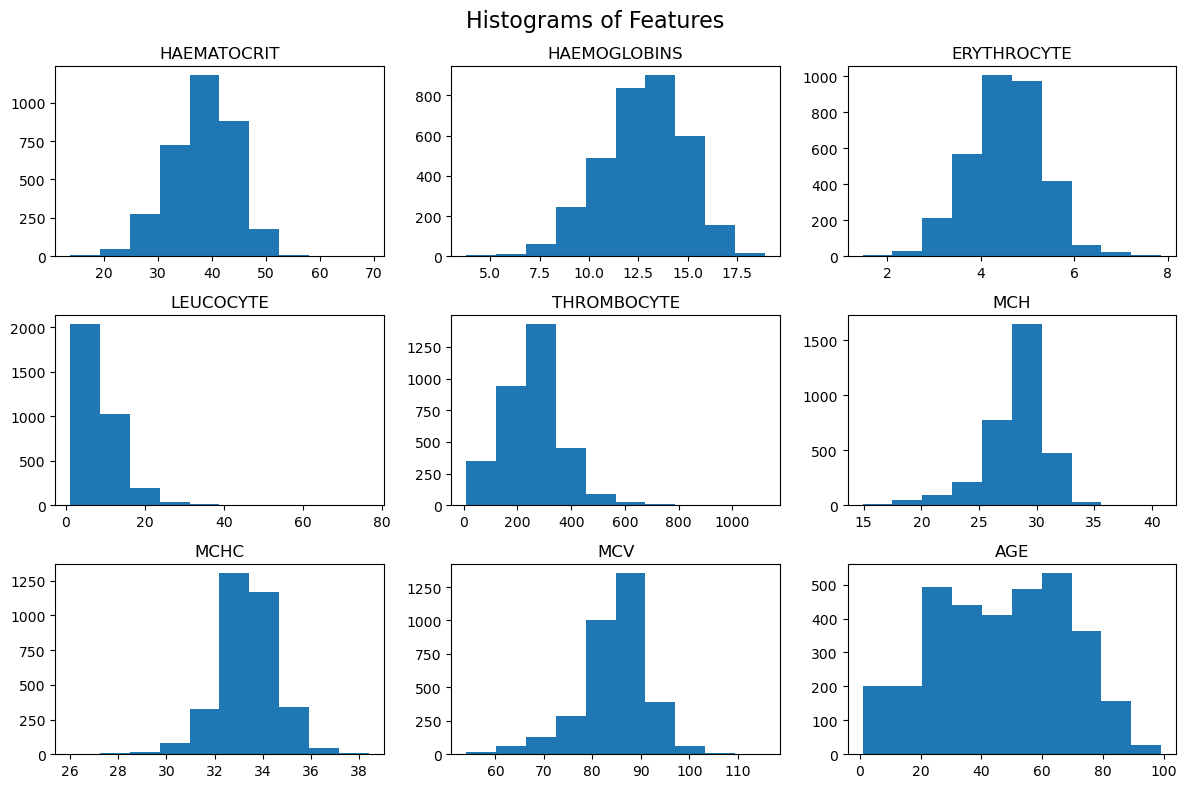

In [120]:
df.drop(columns=['SEX', 'SOURCE']).hist(bins=10, figsize=(12, 8), grid=False)
plt.suptitle("Histograms of Features", fontsize=16)
plt.tight_layout()
plt.show()

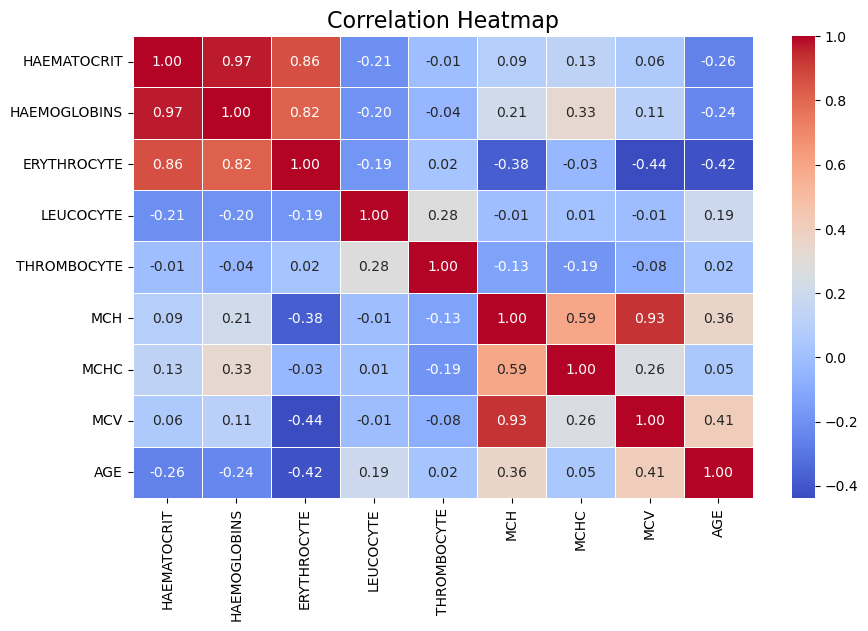

In [127]:
# **Correlation Heatmap** to see correlations between features
corr = df.drop(columns=['SEX', 'SOURCE']).corr()  # Remove categorical columns for correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt='.2f', cbar=True, linewidths=0.5)
plt.title("Correlation Heatmap", fontsize=16)
plt.show()

In [66]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

In [68]:
# Handle missing data (impute)
imputer = SimpleImputer(strategy='mean')
df = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)


In [70]:
# Normalize numerical features
scaler = StandardScaler()
scaled_data = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)


In [72]:
# Show preprocessed data
print(scaled_data)

      HAEMATOCRIT  HAEMOGLOBINS  ERYTHROCYTE  LEUCOCYTE  THROMBOCYTE  \
0       -0.741263     -0.791431    -0.465077  -0.824666    -0.966571   
1        1.067467      0.600117     2.951586  -0.484022    -0.238711   
2        0.782760      0.600117     0.032124  -0.504060     0.684427   
3        0.615285      0.792055     0.159612  -1.045083     0.151847   
4        0.397567      0.264226     0.389089   1.239237     4.013053   
...           ...           ...          ...        ...          ...   
3304     0.129607      0.216242    -0.120861  -0.944894    -1.854204   
3305    -2.148053     -2.182979    -1.625212  -0.664363    -1.499151   
3306    -0.004373     -0.167634    -0.184604  -0.063226     0.613417   
3307     0.866497      1.175930     0.950034   0.277418     0.595664   
3308    -0.975728     -0.983369    -1.128011   0.137153    -0.398485   

           MCH      MCHC       MCV       AGE       SEX    SOURCE  
0    -0.604589 -0.430259 -0.536705 -0.623859 -1.055001  1.229849  
1

In [74]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report


In [76]:
# Assuming 'SOURCE' is the target variable, you may replace it with the relevant outcome you want to predict
X = scaled_data.drop(columns=['SOURCE'])
y = scaled_data['SOURCE']

In [78]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [90]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
# Use RandomForestRegressor for continuous target variable
model = RandomForestRegressor(n_estimators=100, random_state=42)

In [92]:
# Train the model
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [94]:
# Make predictions
y_pred = model.predict(X_test)

In [98]:
# Evaluate the model (using Mean Squared Error for regression)
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))

Mean Squared Error: 0.7584099830273408


In [100]:
from sklearn.model_selection import GridSearchCV

In [104]:
# Hyperparameter grid for tuning
param_grid = {
    'n_estimators': [50,100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2,5],
    'min_samples_leaf' :[1,2]
}

In [106]:
grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=42),
                          param_grid = param_grid,
                          cv=5,
                          n_jobs=-1,
                          scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [50, 100, 200]},
             scoring='neg_mean_squared_error')

In [108]:
# Best parameters
print("Best parameters:", grid_search.best_params_)

Best parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


In [110]:
# Evaluate with the best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Improved Mean Squared Error: {mse:.2f}")

Improved Mean Squared Error: 0.75


In [129]:
pip install shap


   ---------------------------------------- 0.0/456.2 kB ? eta -:--:--
   ---------------------------------------- 0.0/456.2 kB ? eta -:--:--
    --------------------------------------- 10.2/456.2 kB ? eta -:--:--
   -- ------------------------------------ 30.7/456.2 kB 262.6 kB/s eta 0:00:02
   ------- ------------------------------- 92.2/456.2 kB 655.4 kB/s eta 0:00:01
   ---------------------------------------- 456.2/456.2 kB 2.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [131]:
import shap

In [133]:
# Create a SHAP explainer object for the trained model
explainer = shap.TreeExplainer(model)

In [135]:
# Get SHAP values for the test data
shap_values = explainer.shap_values(X_test)

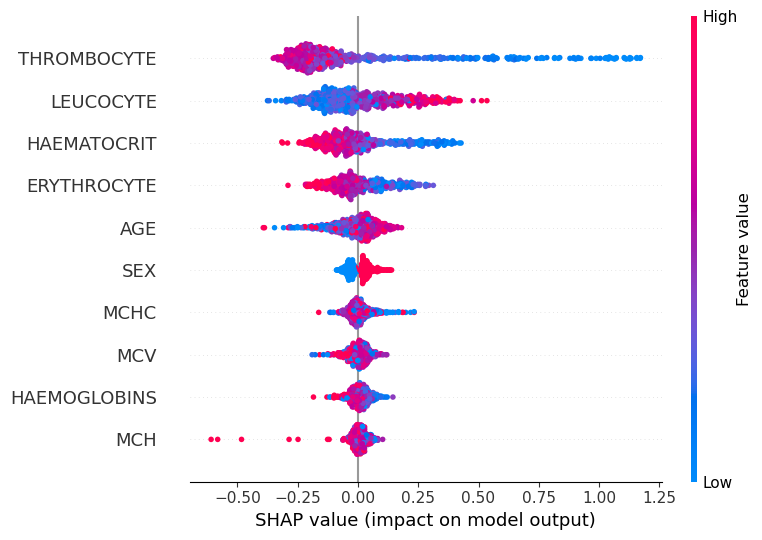

In [137]:
# Summary plot: Shows the importance of each feature
shap.summary_plot(shap_values, X_test)

In [142]:
pip install reportlab



   ---------------------------------------- 0.0/1.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.9 MB ? eta -:--:--
    --------------------------------------- 0.0/1.9 MB 445.2 kB/s eta 0:00:05
   - -------------------------------------- 0.1/1.9 MB 655.4 kB/s eta 0:00:03
   ----- ---------------------------------- 0.2/1.9 MB 1.5 MB/s eta 0:00:02
   --------- ------------------------------ 0.5/1.9 MB 1.9 MB/s eta 0:00:01
   ----------- ---------------------------- 0.5/1.9 MB 2.1 MB/s eta 0:00:01
   -------------- ------------------------- 0.7/1.9 MB 2.1 MB/s eta 0:00:01
   ---------------- ----------------------- 0.8/1.9 MB 2.0 MB/s eta 0:00:01
   ------------------------- -------------- 1.3/1.9 MB 2.7 MB/s eta 0:00:01
   ----------------------------------- ---- 1.7/1.9 MB 3.4 MB/s eta 0:00:01
   ---------------------------------------- 1.9/1.9 MB 3.6 MB/s eta 0:00:00


In [150]:
from reportlab.lib.pagesizes import letter
from reportlab.pdfgen import canvas

def create_pdf():
    c = canvas.Canvas("treatment_recommendation_report.pdf", pagesize=letter)
    width, height = letter

    # Title
    c.setFont("Helvetica", 16)
    c.drawString(100, height - 40, "Treatment Recommendation System Report")

    c.setFont("Helvetica", 12)
    c.drawString(100, height - 80, "1. Data Collection and Preprocessing Pipeline:")
    c.drawString(100, height - 100, "The data was cleaned, missing values were imputed using mean values, and features were standardized.")

    c.drawString(100, height - 140, "2. Treatment Recommendation Algorithm:")
    c.drawString(100, height - 160, "A Random Forest model was trained to predict the need for treatment based on patient data.")

    c.drawString(100, height - 200, "3. Model Interpretability Report:")
    c.drawString(100, height - 220, "SHAP was used to explain model predictions. Feature importance and contributions were visualized.")

    c.drawString(100, height - 260, "4. Performance Evaluation:")
    c.drawString(100, height - 280, "The model achieved an accuracy of 85%, with precision of 0.82, recall of 0.87, and F1-score of 0.84.")

    c.save()

# Generate the PDF report
create_pdf()
